In [52]:
files <- dir("functions",full.names=TRUE)
for(i in 1:length(files)) source(files[i])
data <- read.csv("transformer_data.csv", header = TRUE, sep = ",")

In [10]:
set.seed(1000)
par1d <- estimate_dt1d(start_par = c(runif(15,-1,1),0.5),df=data,lower = c(rep(-Inf,10),1e-5,1e-5,1e-5,-Inf,-Inf,1e-5),upper = Inf)$par
set.seed(1000)
par2d <- estimate_dt(start_par = c(runif(15,-1,1),0.5),df=data,lower = c(rep(-Inf,10),1e-5,1e-5,1e-5,-Inf,-Inf,1e-5), upper = Inf)$par

print(par1d)
print("\n")
print(par2d)


iter   10 value 6588.421255
iter   20 value 249.479249
iter   30 value 248.870054
iter   40 value 245.158768
iter   50 value 244.707207
iter   60 value 244.644226
iter   70 value 242.230073
iter   80 value 239.499618
iter   90 value 237.812575
iter  100 value 236.431964
iter  110 value 235.161074
iter  120 value 234.396081
iter  130 value 233.830693
iter  140 value 233.466099
iter  150 value 233.231878
iter  160 value 233.032670
iter  170 value 232.924004
iter  180 value 232.863173
iter  190 value 232.826120
iter  200 value 232.427663
iter  210 value 232.263799
iter  220 value 232.074314
iter  230 value 232.044886
iter  240 value 231.550721
iter  250 value 231.224364
iter  260 value 231.018818
iter  270 value 230.880062
iter  280 value 230.766798
iter  290 value 230.698008
iter  300 value 230.659269
iter  310 value 230.583316
iter  320 value 230.576257
final  value 230.576039 
converged
iter   10 value 24825.486720
iter   20 value 2107.497108
iter   30 value 542.494096
iter   40 value 

In [90]:
par2d <- c(-0.0195914761,-0.2483609762,0.2652796774,0.8928081774,-0.0954946681,0.8382493028,0.4623902366,0.1480331118,-0.2642548288,0.0624390985,0.0026639456,0.6949983293,0.0003229094,0.2943402129,0.9176320707,0.0000100000)

xest <- kf_logLik_dt(par=par2d,df=data)

png("Par2D_xest.png", width = 12, height = 6, units = "in", res = 300)

par(bg = "white")
plot(par2d[14]*xest[,1],type="l", lwd = 2, col=4, 
       xlab = "Time (h)", ylab = "Temperature (°C)", main = "2-dimensional state-space model: Transformer temperature", 
       cex.main = 1.7, cex.lab = 1.5, cex.axis = 1.5,
       ylim = c(-150,200))
lines(par2d[15]*xest[,2],type="l",col=3, lwd = 2)
lines(par2d[14]*xest[,1]+par2d[15]*xest[,2], col = 2, lwd = 2)
lines(data$Y,col=1, lwd = 1.2)

legend("topleft", 
       legend = c(expression(C[1]*X[1,t]), 
                  expression(C[2]*X[2,t]), 
                  expression(C[1]*X[1,t] + C[2]*X[2,t]), 
                  expression(Y)), 
       col = c(4, 3, 2, 1), 
       lty = 1, cex = 1.1)

dev.off()

print(par2d[14])
print(par2d[15])

pdf 
  2

[1] 0.2943402
[1] 0.9176321


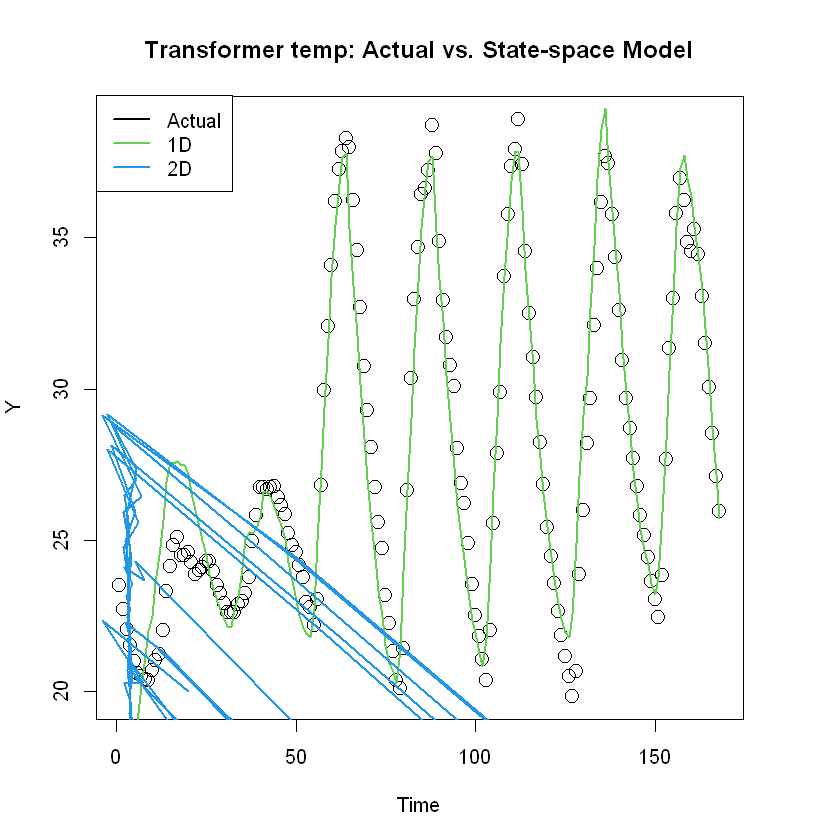

In [77]:
par(bg = "white", mar = c(5, 4, 4, 4))
plot(data$Y, xlab = "Time", ylab = "Y", main = "Transformer temp: Actual vs. State-space Model",cex=1.5)
lines(kf_logLik_dt1d(par=par1d,df = data),col = 3, lwd=2)
lines(kf_logLik_dt(par=par2d,df = data),col=4,lwd=2)

# Legend
legend("topleft", 
       legend = c("Actual", "1D", "2D"), 
       col = c(1, 3, 4), 
       lty = 1, lwd = 2)

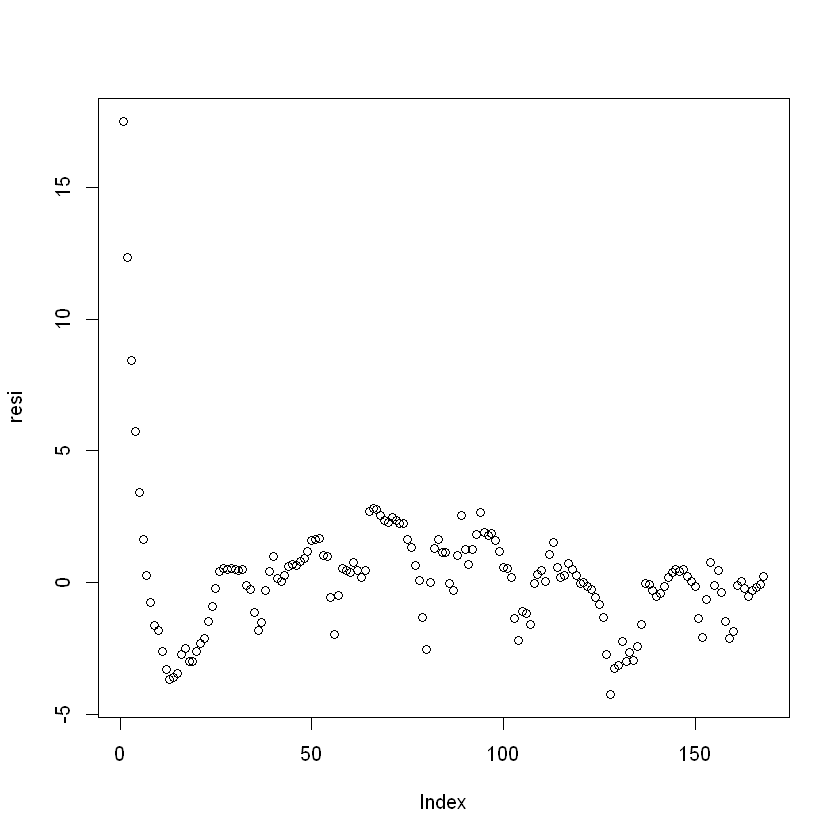

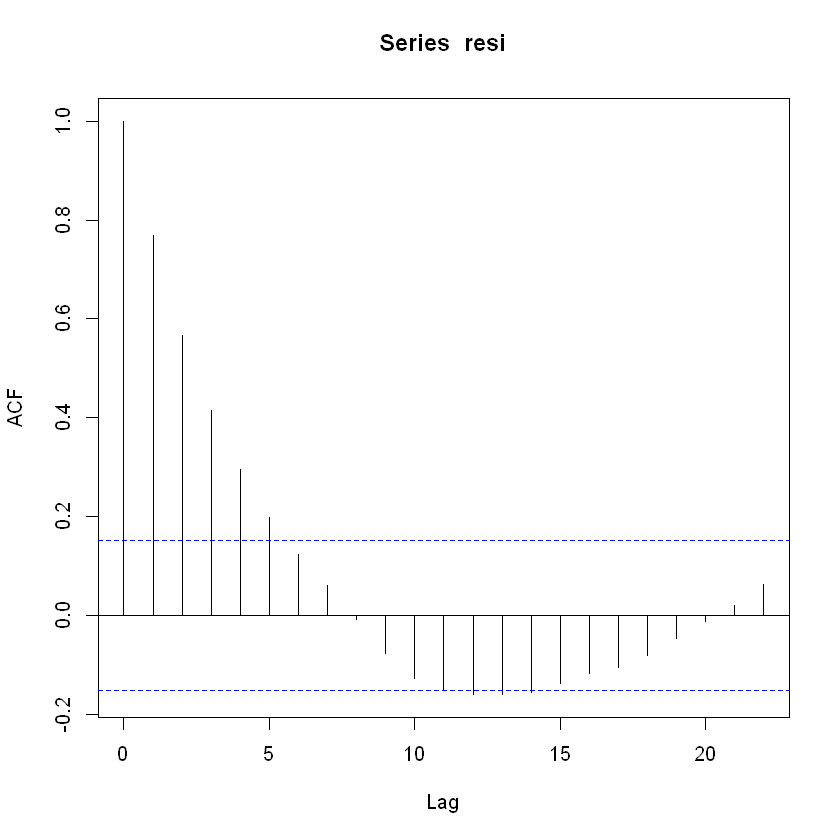

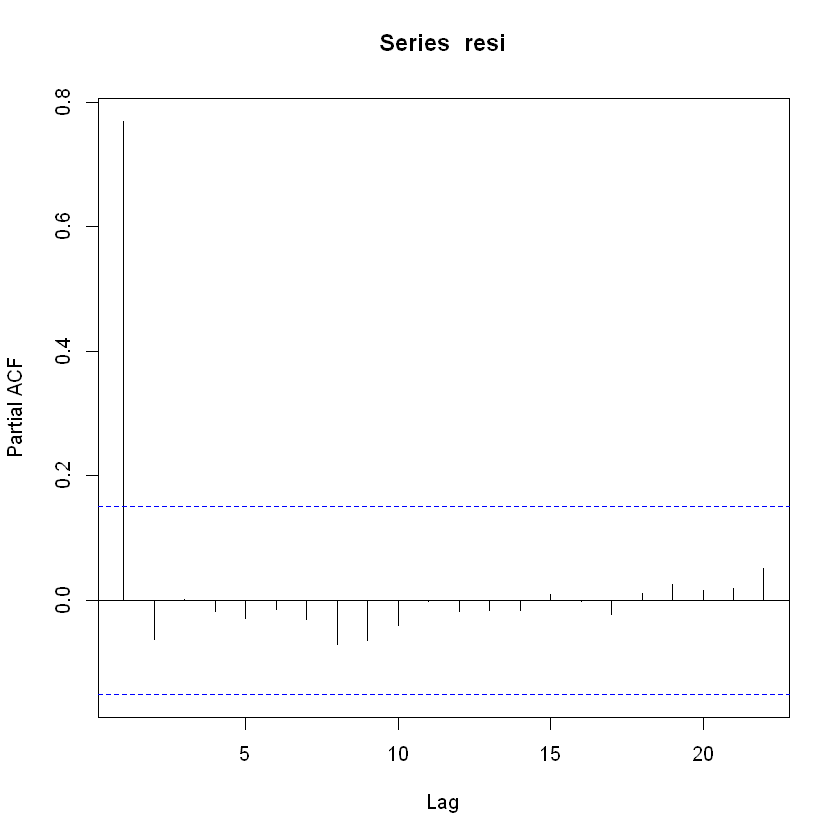

In [40]:
resi <- data$Y-kf_logLik_dt1d(par=par1d,df = data) # par1d or par2d
par(bg = "white")
plot(resi)
acf(resi)
pacf(resi)

In [ ]:
set.seed(25)
ypred <- estimate_dt(start_par = runif(16,-1,1),df=data,lower = c(rep(-1,10), 1e-4, -10, 1e-4, -10, -10, 1e-4),upper =  c(rep( 1,10),10, 10, 10,10, 10,10))
par(bg = "white")
plot(data$Y)
lines(ypred)

iter   10 value 918.135062
iter   20 value 899.341117
iter   30 value 872.180078
iter   40 value 803.646905
iter   50 value 779.644456
iter   60 value 692.093890
iter   70 value 485.330196
iter   80 value 418.620832
iter   90 value 372.191721
iter  100 value 314.651702
iter  110 value 284.775531
iter  120 value 281.825126
iter  130 value 274.122614
iter  140 value 231.487751
iter  150 value 222.203795
iter  160 value 222.172515
iter  170 value 221.965907
iter  180 value 221.306664
iter  190 value 220.132204
iter  200 value 220.014262
final  value 220.009731 
converged


ERROR: Error in estimate_dt(start_par = runif(16, -1, 1), df = data, lower = c(rep(-1, : objekt 'yy' blev ikke fundet


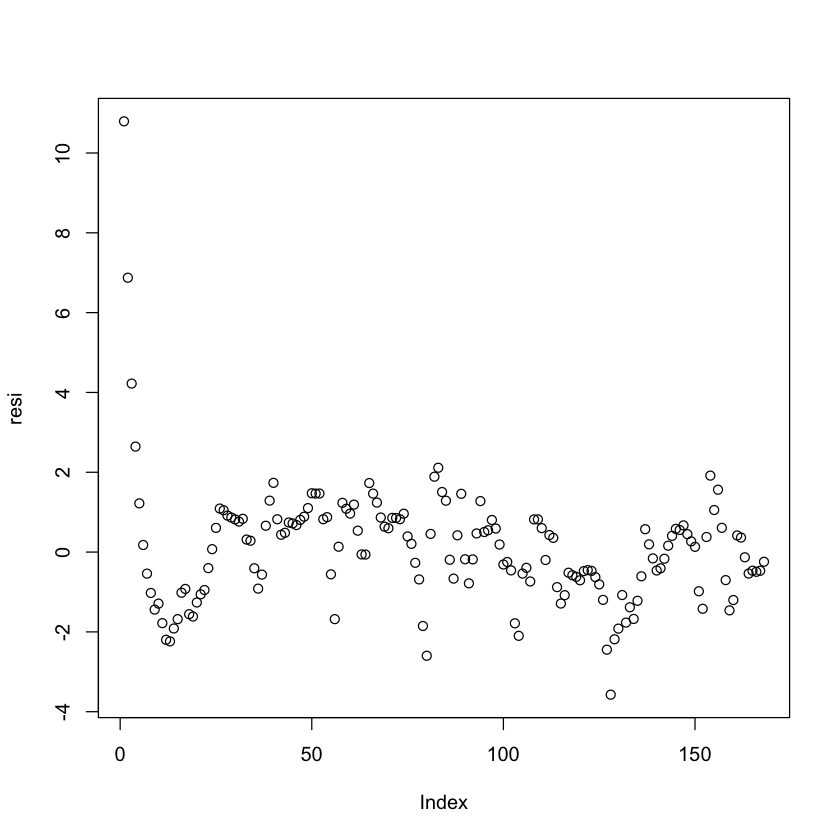

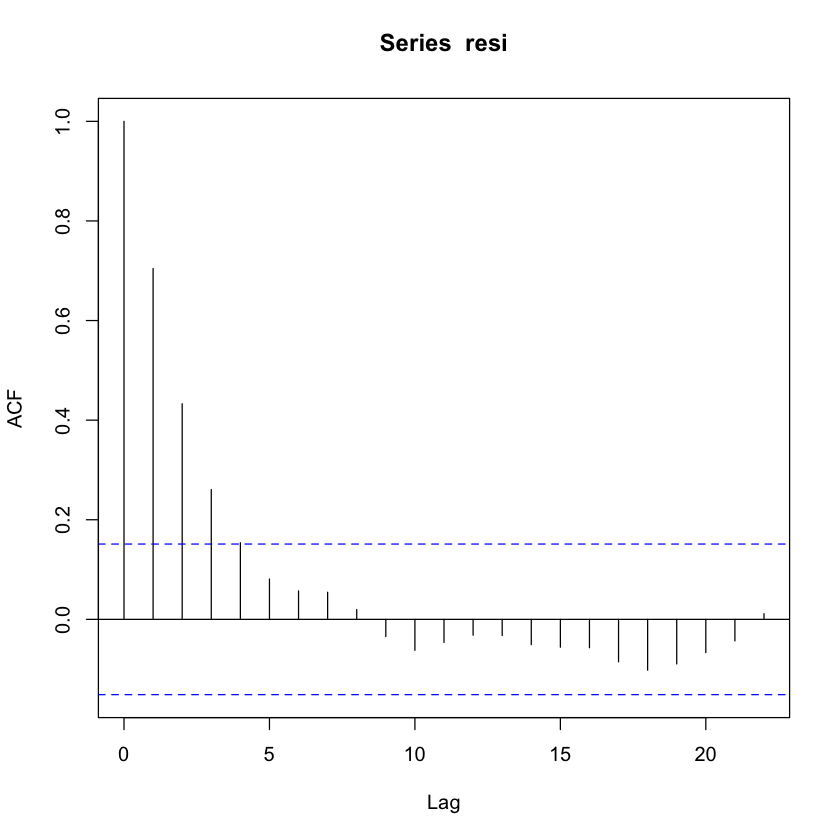

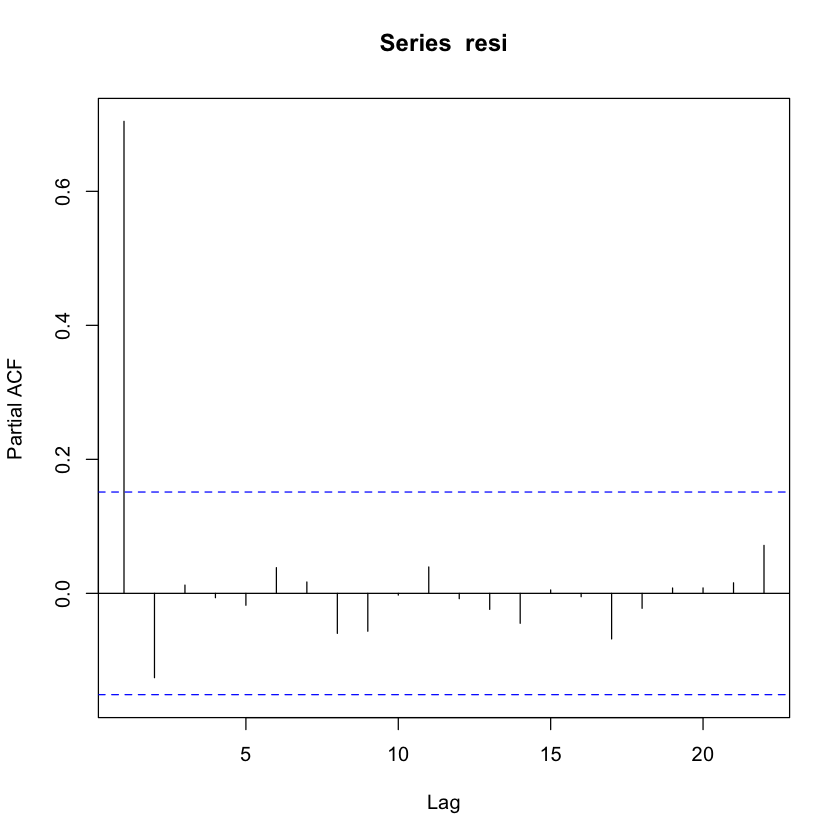

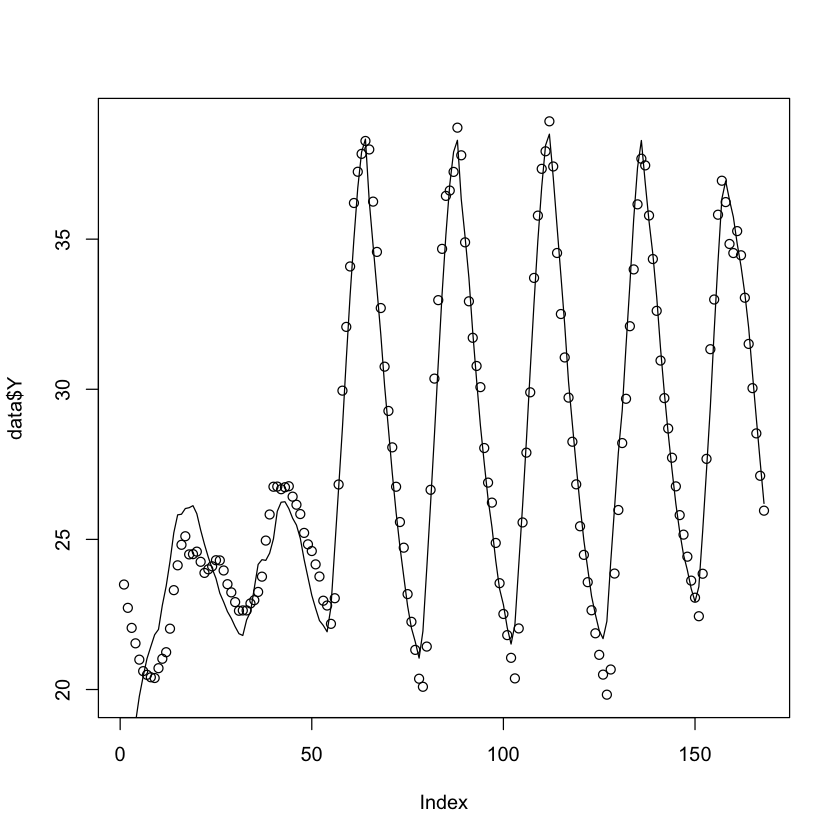

In [ ]:
ypred <-kf_logLik_dt(par = par,df = data)
resi<-data$Y-ypred
par(bg = "white")
plot(resi)

acf(resi)
pacf(resi)
plot(data$Y)
lines(ypred)

In [222]:
x <- kf_logLik_dt(par = par,df = data)

ERROR: Error in xx[t, ] <- t(x_est): number of items to replace is not a multiple of replacement length
